# 03. Data Exploration & Analysis
## Exploratory Data Analysis for Personality Classification

**Project Objective:** Explore and understand the personality dataset through visual analysis and statistical summaries to identify patterns that distinguish extroverts from introverts.

### What We'll Explore
1. **Dataset Overview** - Basic information about our data
2. **Target Variable Analysis** - Understanding personality distribution
3. **Feature Distributions** - How individual features are distributed
4. **Feature Relationships** - Correlations between variables
5. **Key Insights** - Findings for model development

### Visualization Types
- **Bar Charts** - For categorical data comparison
- **Pie Charts** - For proportion visualization  
- **Distribution Charts** - For numerical feature patterns
- **Correlation Heatmap** - For feature relationships

Let's start exploring our personality classification dataset!


In [65]:
# Import necessary libraries for comprehensive data analysis
import pandas as pd                    # Data manipulation and analysis
import numpy as np                     # Numerical computing
import matplotlib.pyplot as plt        # Static plotting
import seaborn as sns                  # Statistical data visualization
from scipy import stats               # Statistical functions
from scipy.stats import chi2_contingency  # Chi-square test for categorical variables
import plotly.express as px           # Interactive plotting
import plotly.graph_objects as go     # Advanced plotly objects
from plotly.subplots import make_subplots  # Subplot creation
import warnings
warnings.filterwarnings('ignore')     # Suppress warning messages for cleaner output

# Configure plotting parameters for consistent visualization
plt.style.use('default')              # Use default matplotlib style
sns.set_palette("husl")               # Set seaborn color palette
plt.rcParams['figure.figsize'] = (12, 8)  # Default figure size
plt.rcParams['font.size'] = 10        # Default font size

# Configure pandas display options for better data viewing
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)       # No width limit for display

print("Libraries imported successfully!")
print("Environment configured for comprehensive data exploration!")
print("Ready to uncover insights in personality classification data!")


Libraries imported successfully!
Environment configured for comprehensive data exploration!
Ready to uncover insights in personality classification data!


## Dataset Overview

Let's start by loading our data and getting familiar with its structure.


In [66]:
# Load the cleaned dataset
df = pd.read_csv('../data/processed/personality_dataset_cleaned.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1]}")
print(f"Records: {df.shape[0]:,}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nColumn Overview:")
for i, col in enumerate(df.columns, 1):
    dtype = str(df[col].dtype)
    unique = df[col].nunique()
    print(f"{i:2d}. {col:<25} | {dtype:<10} | {unique:,} unique values")

print(f"\nDataset loaded successfully!")

# Quick peek at the data
print(f"\nSample Data:")
display(df.head(3))


=== DATASET OVERVIEW ===
Dataset Shape: (2512, 16)
Features: 16
Records: 2,512
Memory Usage: 0.63 MB

Column Overview:
 1. Time_spent_Alone          | float64    | 11 unique values
 2. Stage_fear                | object     | 2 unique values
 3. Social_event_attendance   | float64    | 11 unique values
 4. Going_outside             | float64    | 8 unique values
 5. Drained_after_socializing | object     | 2 unique values
 6. Friends_circle_size       | float64    | 11 unique values
 7. Post_frequency            | float64    | 11 unique values
 8. Personality               | object     | 2 unique values
 9. Social_Activity_Score     | float64    | 28 unique values
10. Introversion_Score        | float64    | 21 unique values
11. Social_Comfort            | float64    | 17 unique values
12. Digital_vs_Physical_Social | float64    | 13 unique values
13. Social_Energy_Balance     | float64    | 16 unique values
14. Has_Stage_Fear            | int64      | 2 unique values
15. Gets_Drained_

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_Activity_Score,Introversion_Score,Social_Comfort,Digital_vs_Physical_Social,Social_Energy_Balance,Has_Stage_Fear,Gets_Drained_Socializing,Is_Introvert
0,4.0,No,4.0,6.0,No,10.0,5.0,Extrovert,5.000000,1.333333,10.0,1.0,4.0,0,0,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,1.000000,9.666667,0.0,3.0,-5.0,1,1,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,1.666667,9.666667,2.5,1.0,-4.0,1,1,1


## Target Variable Analysis

Let's examine our target variable (Personality) to understand the distribution of extroverts vs introverts.


=== TARGET VARIABLE ANALYSIS ===

Personality Distribution:
   - Extrovert: 1,417 (56.4%)
   - Introvert: 1,095 (43.6%)


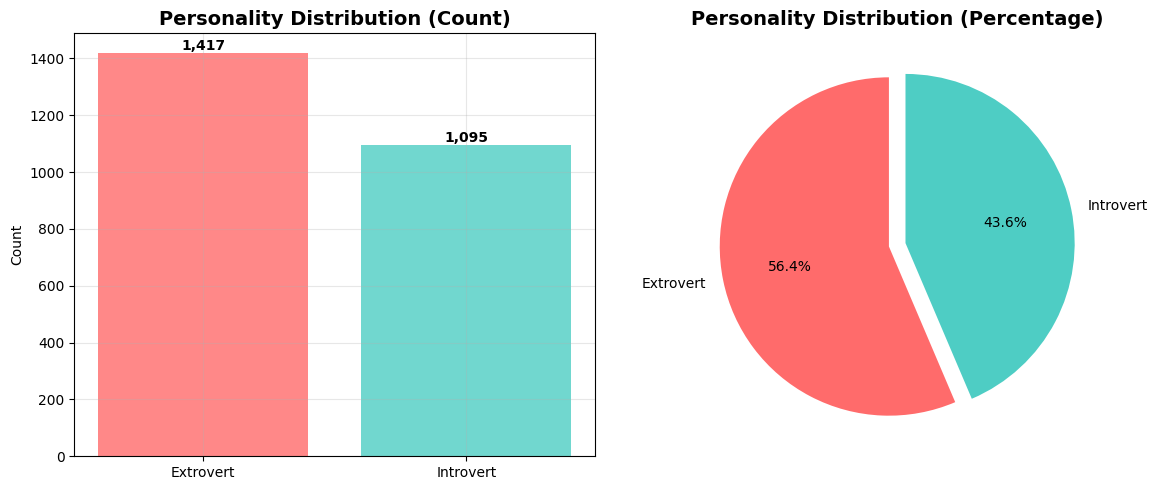


Class Balance Ratio: 1.29:1
   Status: Well balanced


In [67]:
# Target Variable Distribution
print("=== TARGET VARIABLE ANALYSIS ===\n")

# Get personality counts
personality_counts = df['Personality'].value_counts()
personality_pct = df['Personality'].value_counts(normalize=True) * 100

print("Personality Distribution:")
for personality, count in personality_counts.items():
    pct = personality_pct[personality]
    print(f"   - {personality}: {count:,} ({pct:.1f}%)")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
colors = ['#FF6B6B', '#4ECDC4']
bars = axes[0].bar(personality_counts.index, personality_counts.values, color=colors, alpha=0.8)
axes[0].set_title('Personality Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(personality_pct.values, labels=personality_pct.index, autopct='%1.1f%%', 
           colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Personality Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class balance assessment
balance_ratio = personality_counts.max() / personality_counts.min()
print(f"\nClass Balance Ratio: {balance_ratio:.2f}:1")
if balance_ratio <= 1.5:
    print("   Status: Well balanced")
elif balance_ratio <= 3:
    print("   Status: Moderately imbalanced")
else:
    print("   Status: Highly imbalanced")


## Categorical Features Analysis

Let's examine the categorical features in our dataset.


=== CATEGORICAL FEATURES ANALYSIS ===

Stage_fear:
   - No: 1,421 (56.6%)
   - Yes: 1,091 (43.4%)

Drained_after_socializing:
   - No: 1,423 (56.6%)
   - Yes: 1,089 (43.4%)



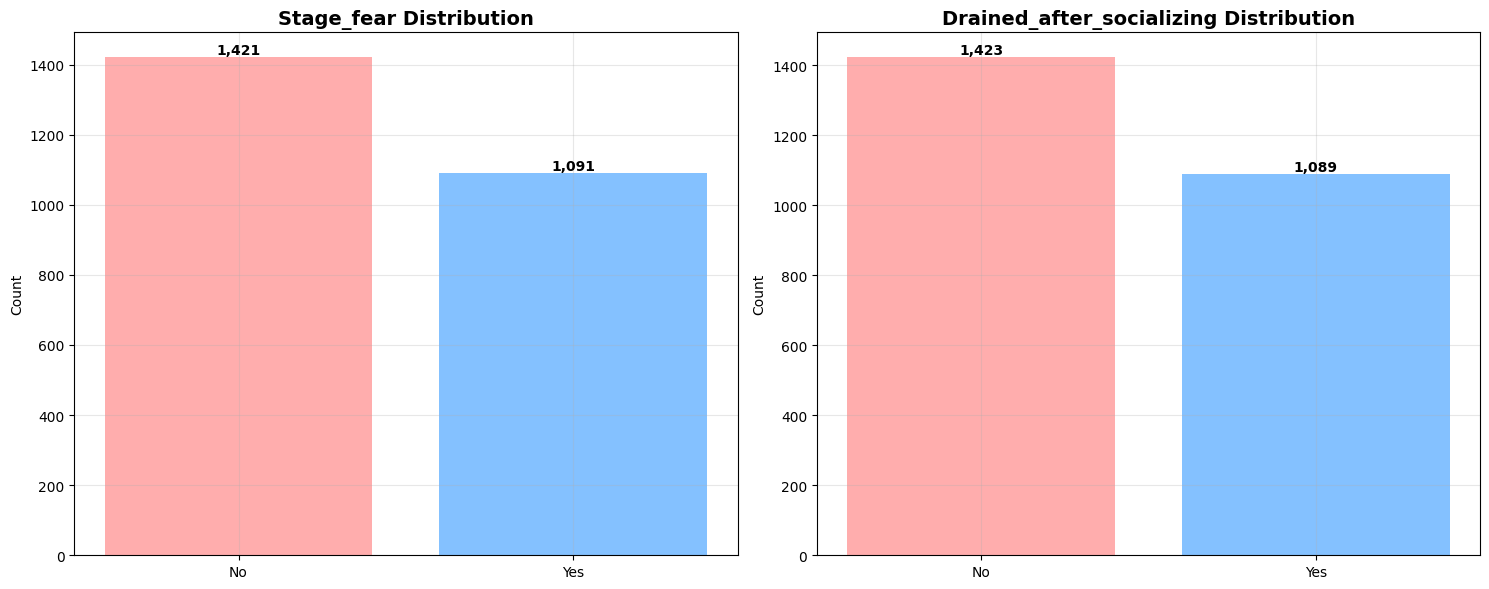

In [68]:
# Categorical Features Analysis
print("=== CATEGORICAL FEATURES ANALYSIS ===\n")

# Identify categorical features
categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Create bar charts for categorical features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, feature in enumerate(categorical_features):
    # Get value counts
    counts = df[feature].value_counts()
    
    # Create bar chart
    colors = ['#FF9999', '#66B2FF']
    bars = axes[i].bar(counts.index, counts.values, color=colors, alpha=0.8)
    axes[i].set_title(f'{feature} Distribution', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count')
    axes[i].grid(True, alpha=0.3)
    
    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
    
    # Print statistics
    print(f"{feature}:")
    for category, count in counts.items():
        pct = (count / len(df)) * 100
        print(f"   - {category}: {count:,} ({pct:.1f}%)")
    print()

plt.tight_layout()
plt.show()


## Numerical Features Distribution

Now let's examine how the numerical features are distributed.


=== NUMERICAL FEATURES DISTRIBUTION BY PERSONALITY TYPE ===



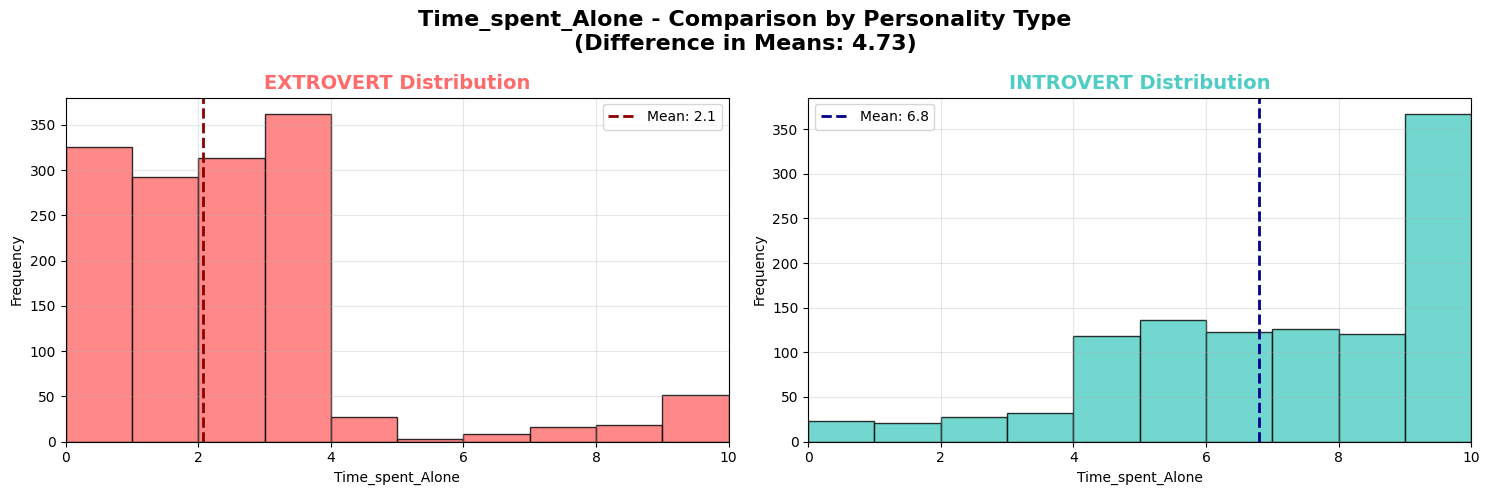

Time_spent_Alone:
   - Extrovert Average: 2.07
   - Introvert Average: 6.80
   - Difference: 4.73
   - Pattern: Introverts score HIGHER
--------------------------------------------------


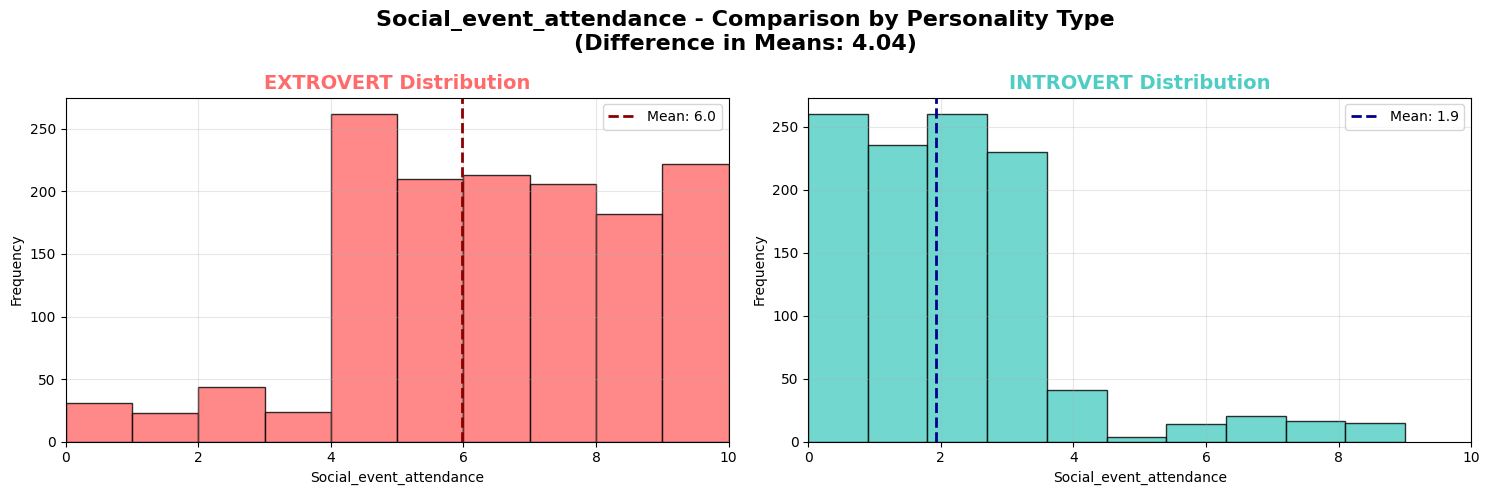

Social_event_attendance:
   - Extrovert Average: 5.98
   - Introvert Average: 1.93
   - Difference: 4.04
   - Pattern: Extroverts score HIGHER
--------------------------------------------------


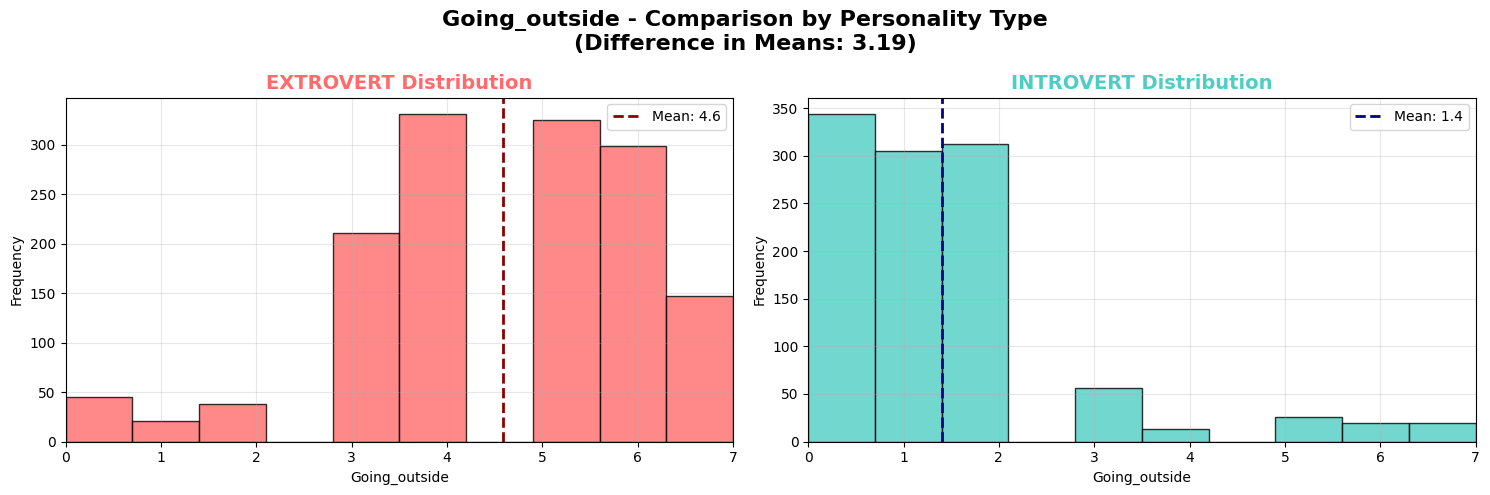

Going_outside:
   - Extrovert Average: 4.59
   - Introvert Average: 1.40
   - Difference: 3.19
   - Pattern: Extroverts score HIGHER
--------------------------------------------------


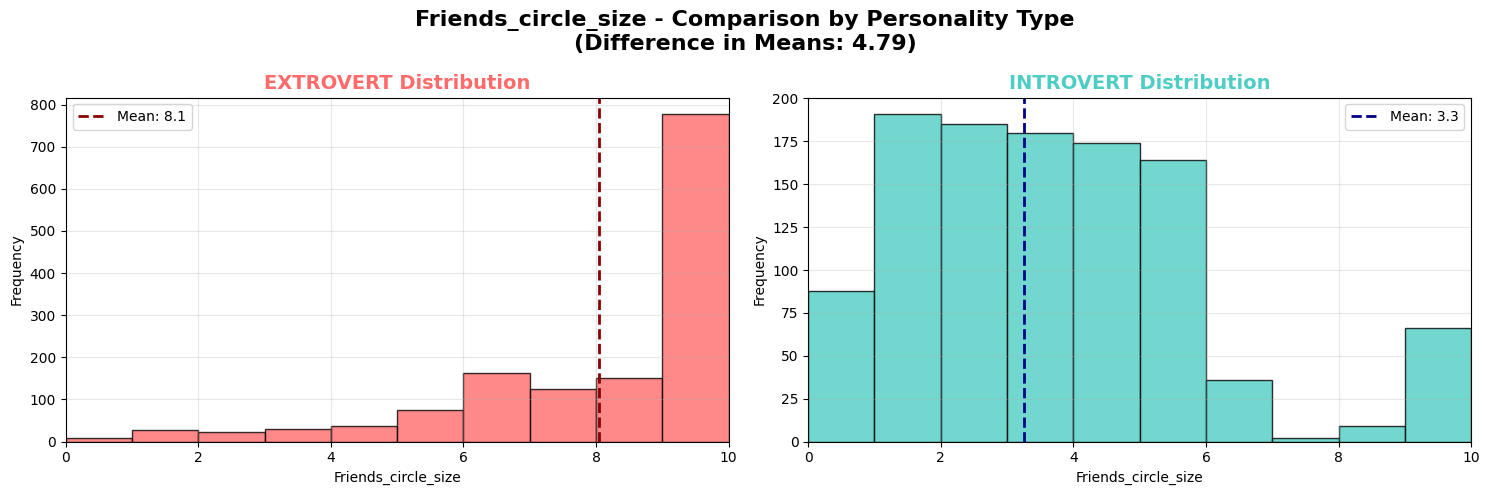

Friends_circle_size:
   - Extrovert Average: 8.05
   - Introvert Average: 3.26
   - Difference: 4.79
   - Pattern: Extroverts score HIGHER
--------------------------------------------------


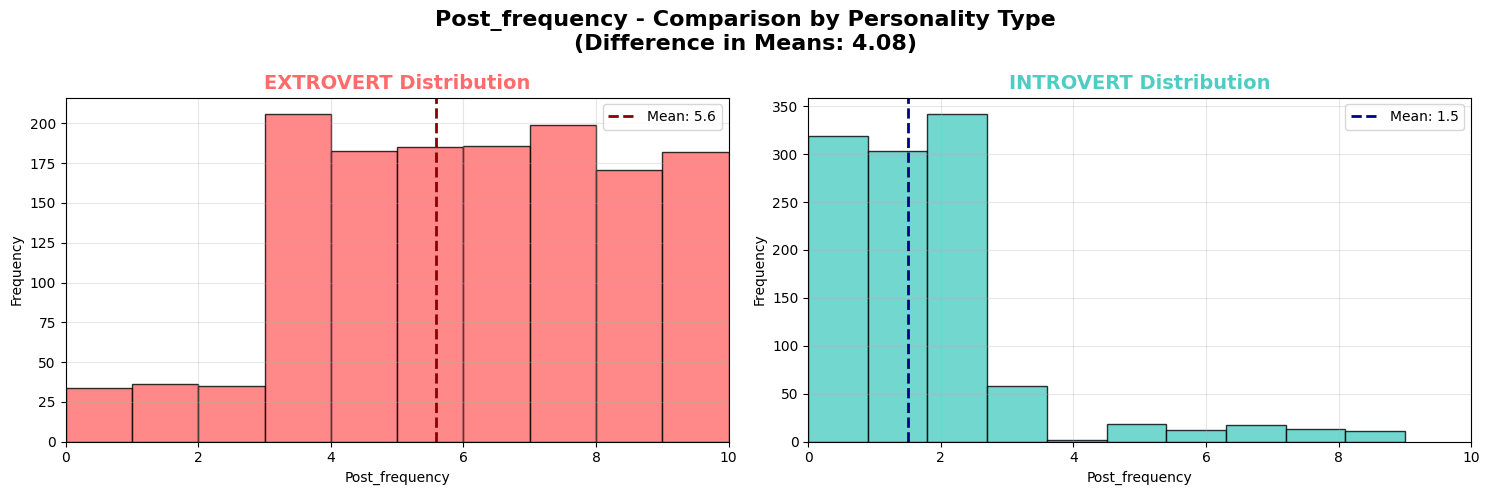

Post_frequency:
   - Extrovert Average: 5.59
   - Introvert Average: 1.51
   - Difference: 4.08
   - Pattern: Extroverts score HIGHER
--------------------------------------------------


In [69]:
# Numerical Features Distribution by Personality Type
print("=== NUMERICAL FEATURES DISTRIBUTION BY PERSONALITY TYPE ===\n")

# Key numerical features to analyze
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                     'Friends_circle_size', 'Post_frequency']

# Create side-by-side comparison plots for each feature
for feature in numerical_features:
    # Create figure with 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Get data for each personality type
    extrovert_data = df[df['Personality'] == 'Extrovert'][feature]
    introvert_data = df[df['Personality'] == 'Introvert'][feature]
    
    # Plot Extrovert distribution
    ax1.hist(extrovert_data, bins=10, color='#FF6B6B', alpha=0.8, edgecolor='black')
    ax1.set_title('EXTROVERT Distribution', fontsize=14, fontweight='bold', color='#FF6B6B')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)
    
    # Add statistics for extroverts
    ext_mean = extrovert_data.mean()
    ext_median = extrovert_data.median()
    ax1.axvline(ext_mean, color='darkred', linestyle='--', linewidth=2, label=f'Mean: {ext_mean:.1f}')
    ax1.legend()
    
    # Plot Introvert distribution
    ax2.hist(introvert_data, bins=10, color='#4ECDC4', alpha=0.8, edgecolor='black')
    ax2.set_title('INTROVERT Distribution', fontsize=14, fontweight='bold', color='#4ECDC4')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.3)
    
    # Add statistics for introverts
    int_mean = introvert_data.mean()
    int_median = introvert_data.median()
    ax2.axvline(int_mean, color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {int_mean:.1f}')
    ax2.legend()
    
    # Make sure both plots have the same x-axis scale for comparison
    min_val = min(extrovert_data.min(), introvert_data.min())
    max_val = max(extrovert_data.max(), introvert_data.max())
    ax1.set_xlim(min_val, max_val)
    ax2.set_xlim(min_val, max_val)
    
    # Add main title
    difference = abs(ext_mean - int_mean)
    plt.suptitle(f'{feature} - Comparison by Personality Type\n(Difference in Means: {difference:.2f})', 
                fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary for this feature
    print(f"{feature}:")
    print(f"   - Extrovert Average: {ext_mean:.2f}")
    print(f"   - Introvert Average: {int_mean:.2f}")
    print(f"   - Difference: {difference:.2f}")
    if ext_mean > int_mean:
        print(f"   - Pattern: Extroverts score HIGHER")
    else:
        print(f"   - Pattern: Introverts score HIGHER")
    print("-" * 50)


## Feature Correlations

Let's examine how features relate to each other using a correlation heatmap.


=== FEATURE CORRELATIONS ANALYSIS ===



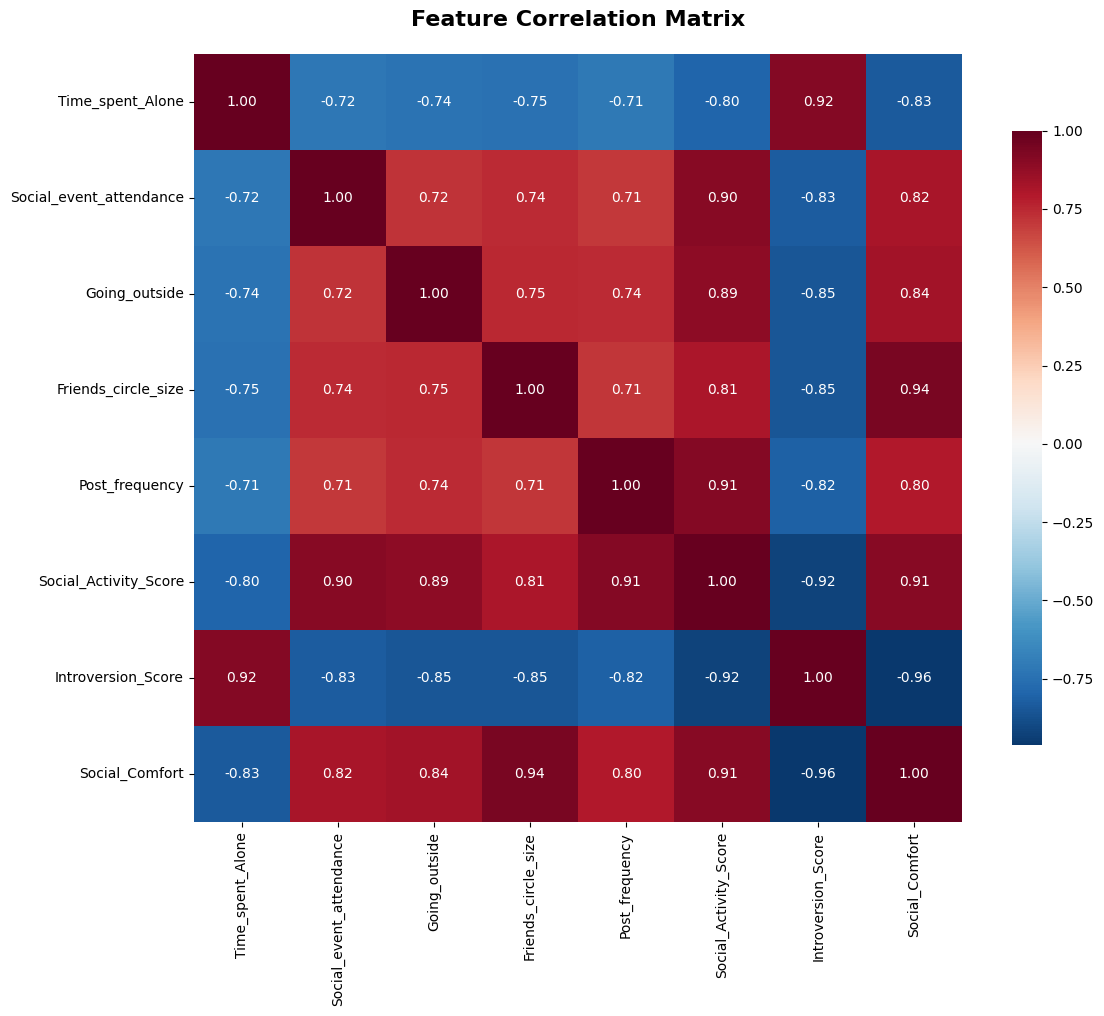

Strong Correlations (|r| > 0.5):
   - Time_spent_Alone ↔ Social_event_attendance: r = -0.722
   - Time_spent_Alone ↔ Going_outside: r = -0.738
   - Time_spent_Alone ↔ Friends_circle_size: r = -0.746
   - Time_spent_Alone ↔ Post_frequency: r = -0.713
   - Time_spent_Alone ↔ Social_Activity_Score: r = -0.801
   - Time_spent_Alone ↔ Introversion_Score: r = 0.915
   - Time_spent_Alone ↔ Social_Comfort: r = -0.835
   - Social_event_attendance ↔ Going_outside: r = 0.718
   - Social_event_attendance ↔ Friends_circle_size: r = 0.743
   - Social_event_attendance ↔ Post_frequency: r = 0.708
   - Social_event_attendance ↔ Social_Activity_Score: r = 0.903
   - Social_event_attendance ↔ Introversion_Score: r = -0.826
   - Social_event_attendance ↔ Social_Comfort: r = 0.820
   - Going_outside ↔ Friends_circle_size: r = 0.749
   - Going_outside ↔ Post_frequency: r = 0.740
   - Going_outside ↔ Social_Activity_Score: r = 0.890
   - Going_outside ↔ Introversion_Score: r = -0.849
   - Going_outside ↔ Soc

In [70]:
# Feature Correlations Analysis
print("=== FEATURE CORRELATIONS ANALYSIS ===\n")

# Select numerical features for correlation (fixing the KeyError)
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                     'Friends_circle_size', 'Post_frequency', 'Social_Activity_Score', 
                     'Introversion_Score', 'Social_Comfort']

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strong correlations
print("Strong Correlations (|r| > 0.5):")
strong_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            strong_corr_pairs.append((feature1, feature2, corr_val))
            print(f"   - {feature1} ↔ {feature2}: r = {corr_val:.3f}")

if not strong_corr_pairs:
    print("   - No strong correlations (|r| > 0.5) found")

# Feature relationships with personality
print(f"\nFeature Averages by Personality Type:")
for feature in ['Time_spent_Alone', 'Social_event_attendance', 'Social_Activity_Score', 'Introversion_Score']:
    extrovert_mean = df[df['Personality'] == 'Extrovert'][feature].mean()
    introvert_mean = df[df['Personality'] == 'Introvert'][feature].mean()
    
    print(f"\n{feature}:")
    print(f"   - Extrovert Average: {extrovert_mean:.2f}")
    print(f"   - Introvert Average: {introvert_mean:.2f}")
    print(f"   - Difference: {abs(extrovert_mean - introvert_mean):.2f}")


## Engineered Features Analysis

Let's examine the engineered features that were created from the original data.


=== ENGINEERED FEATURES ANALYSIS ===



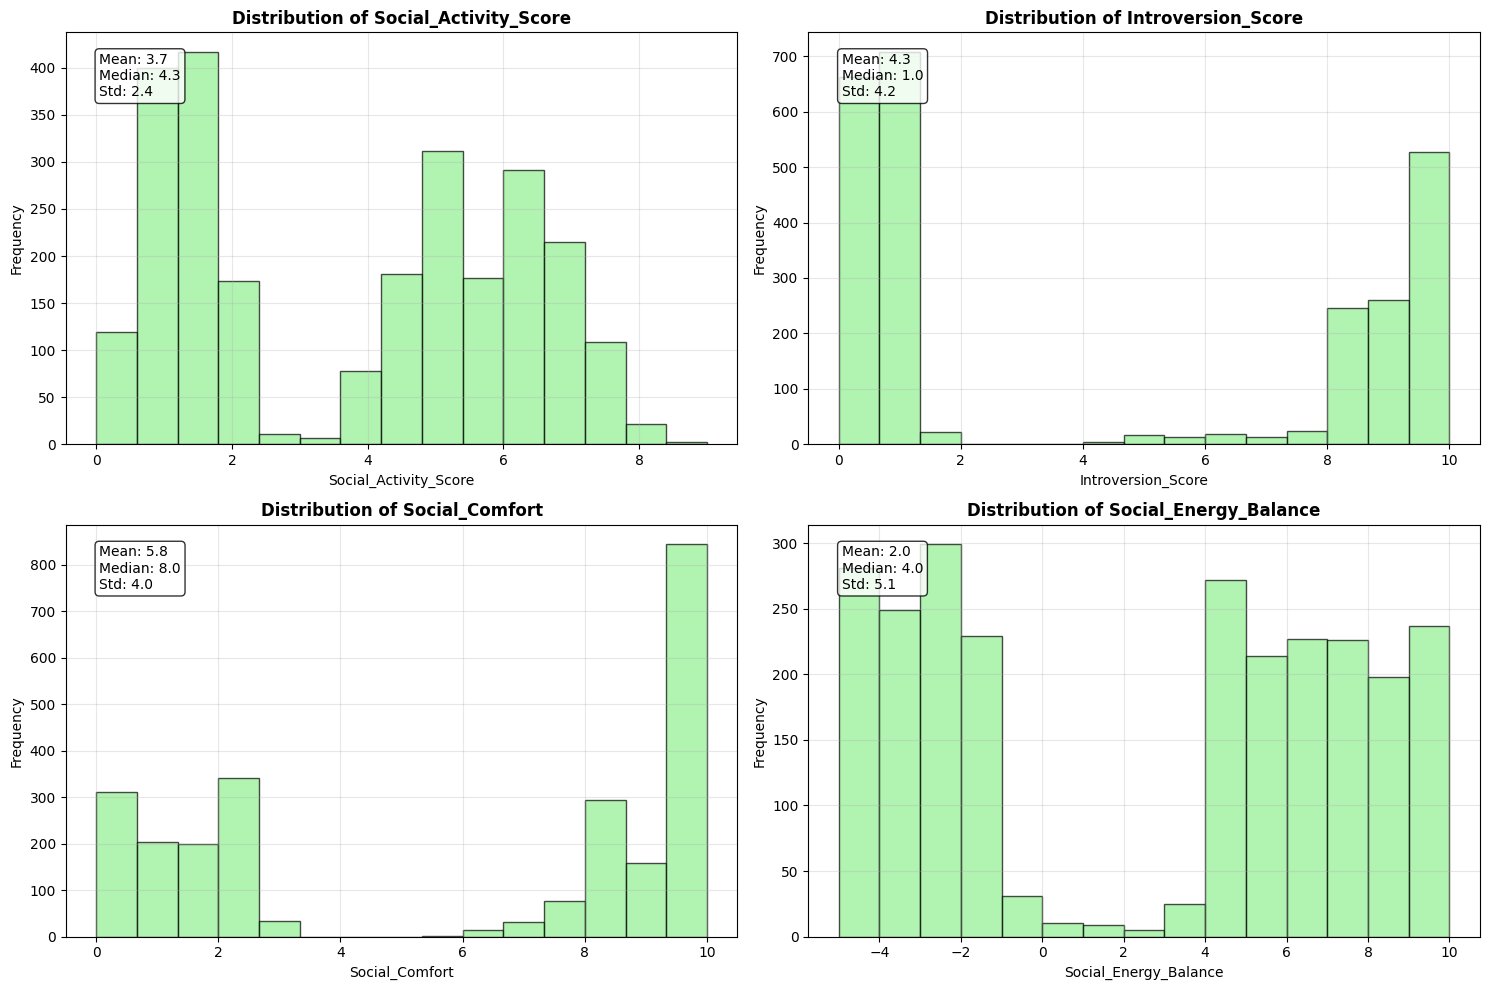

Engineered Feature Averages by Personality Type:

Social_Activity_Score:
   - Extrovert Average: 5.38
   - Introvert Average: 1.61
   - Difference: 3.77

Introversion_Score:
   - Extrovert Average: 1.18
   - Introvert Average: 8.26
   - Difference: 7.08

Social_Comfort:
   - Extrovert Average: 8.65
   - Introvert Average: 2.13
   - Difference: 6.53

Social_Energy_Balance:
   - Extrovert Average: 5.61
   - Introvert Average: -2.56
   - Difference: 8.17


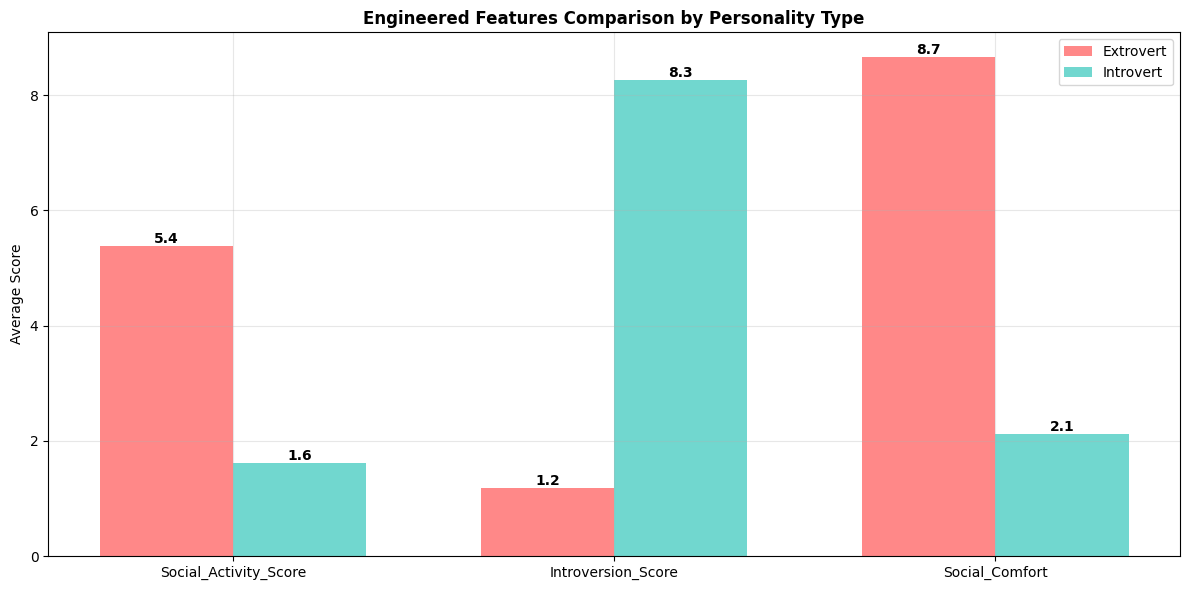

In [71]:
# Engineered Features Analysis
print("=== ENGINEERED FEATURES ANALYSIS ===\n")

# Engineered features to analyze
engineered_features = ['Social_Activity_Score', 'Introversion_Score', 'Social_Comfort', 
                      'Social_Energy_Balance']

# Create distribution plots for engineered features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(engineered_features):
    # Create histogram
    axes[i].hist(df[feature], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()
    
    # Add text box with stats
    stats_text = f'Mean: {mean_val:.1f}\nMedian: {median_val:.1f}\nStd: {std_val:.1f}'
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Feature comparison by personality type
print("Engineered Feature Averages by Personality Type:")
for feature in engineered_features:
    extrovert_mean = df[df['Personality'] == 'Extrovert'][feature].mean()
    introvert_mean = df[df['Personality'] == 'Introvert'][feature].mean()
    
    print(f"\n{feature}:")
    print(f"   - Extrovert Average: {extrovert_mean:.2f}")
    print(f"   - Introvert Average: {introvert_mean:.2f}")
    print(f"   - Difference: {abs(extrovert_mean - introvert_mean):.2f}")

# Create comparison bar chart for key engineered features
comparison_features = ['Social_Activity_Score', 'Introversion_Score', 'Social_Comfort']
extrovert_means = [df[df['Personality'] == 'Extrovert'][feat].mean() for feat in comparison_features]
introvert_means = [df[df['Personality'] == 'Introvert'][feat].mean() for feat in comparison_features]

x = np.arange(len(comparison_features))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, extrovert_means, width, label='Extrovert', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar(x + width/2, introvert_means, width, label='Introvert', color='#4ECDC4', alpha=0.8)

ax.set_ylabel('Average Score')
ax.set_title('Engineered Features Comparison by Personality Type', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_features)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Advanced Pattern Analysis

=== ADVANCED PATTERN ANALYSIS ===

1. Behavioral Profiles by Personality Type:


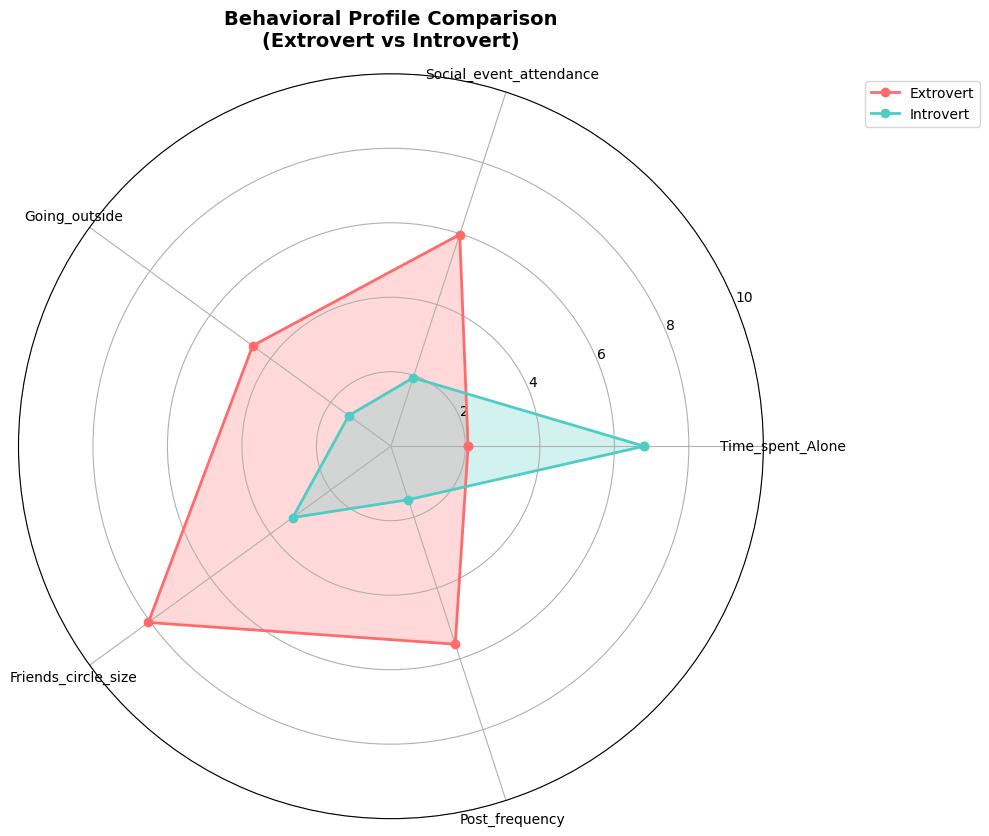


2. Categorical Feature Analysis:
   - Stage_fear: Statistically Significant (p = 0.000)
   - Drained_after_socializing: Statistically Significant (p = 0.000)


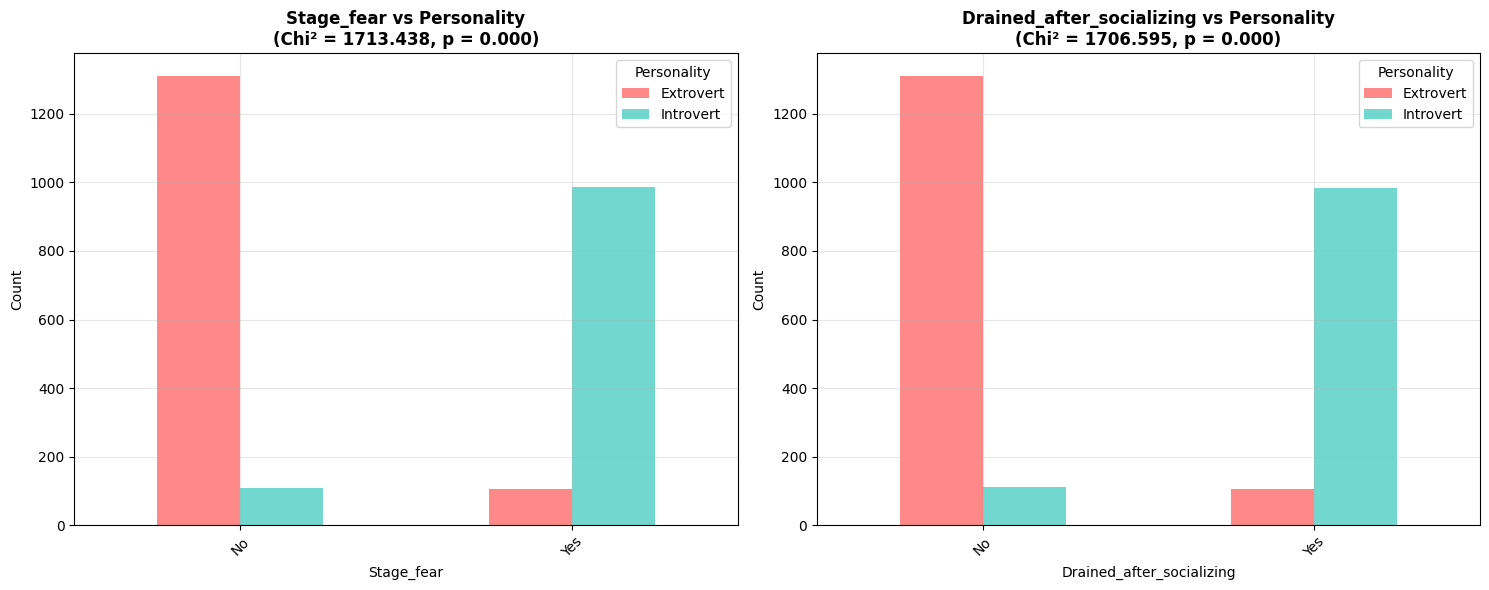


3. Engineered Feature Analysis:
   - Social_Activity_Score:
     - Effect Size (Cohen's d): 2.482 (Large)
     - Statistical Significance: p = 0.000
     - Extrovert Mean: 5.38
     - Introvert Mean: 1.61
   - Introversion_Score:
     - Effect Size (Cohen's d): 2.964 (Large)
     - Statistical Significance: p = 0.000
     - Extrovert Mean: 1.18
     - Introvert Mean: 8.26
   - Social_Comfort:
     - Effect Size (Cohen's d): 2.766 (Large)
     - Statistical Significance: p = 0.000
     - Extrovert Mean: 8.65
     - Introvert Mean: 2.13

Advanced pattern analysis completed!


In [72]:
# Advanced Pattern Analysis
print("=== ADVANCED PATTERN ANALYSIS ===\n")

# 1. Behavioral Profile Analysis
print("1. Behavioral Profiles by Personality Type:")

# Create behavioral profiles
behavioral_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                      'Friends_circle_size', 'Post_frequency']

# Calculate means for each personality type
profile_data = []
for personality in ['Extrovert', 'Introvert']:
    subset = df[df['Personality'] == personality]
    profile = {}
    for feature in behavioral_features:
        profile[feature] = subset[feature].mean()
    profile_data.append(profile)

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(behavioral_features), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = ['#FF6B6B', '#4ECDC4']
personalities = ['Extrovert', 'Introvert']

for i, (personality, profile) in enumerate(zip(personalities, profile_data)):
    values = [profile[feature] for feature in behavioral_features]
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=personality, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(behavioral_features, fontsize=10)
ax.set_ylim(0, 10)
ax.set_title('Behavioral Profile Comparison\n(Extrovert vs Introvert)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

# 2. Categorical Feature Analysis
print("\n2. Categorical Feature Analysis:")

categorical_features = ['Stage_fear', 'Drained_after_socializing']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, feature in enumerate(categorical_features):
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['Personality'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Visualization
    contingency_table.plot(kind='bar', ax=axes[i], color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
    axes[i].set_title(f'{feature} vs Personality\n(Chi² = {chi2:.3f}, p = {p_value:.3f})', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Personality')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Statistical significance
    if p_value < 0.05:
        significance = "Statistically Significant"
    else:
        significance = "Not Significant"
    
    print(f"   - {feature}: {significance} (p = {p_value:.3f})")

plt.tight_layout()
plt.show()

# 3. Engineered Feature Performance
print("\n3. Engineered Feature Analysis:")

engineered_features = ['Social_Activity_Score', 'Introversion_Score', 'Social_Comfort']

# Calculate effect sizes (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * group1.var() + (n2 - 1) * group2.var()) / (n1 + n2 - 2))
    return (group1.mean() - group2.mean()) / pooled_std

for feature in engineered_features:
    extrovert_data = df[df['Personality'] == 'Extrovert'][feature]
    introvert_data = df[df['Personality'] == 'Introvert'][feature]
    
    # Calculate effect size
    effect_size = abs(cohens_d(extrovert_data, introvert_data))
    
    # T-test
    t_stat, p_value = stats.ttest_ind(extrovert_data, introvert_data)
    
    # Interpretation
    if effect_size < 0.2:
        effect_interpretation = "Small"
    elif effect_size < 0.5:
        effect_interpretation = "Small-Medium"
    elif effect_size < 0.8:
        effect_interpretation = "Medium-Large"
    else:
        effect_interpretation = "Large"
    
    print(f"   - {feature}:")
    print(f"     - Effect Size (Cohen's d): {effect_size:.3f} ({effect_interpretation})")
    print(f"     - Statistical Significance: p = {p_value:.3f}")
    print(f"     - Extrovert Mean: {extrovert_data.mean():.2f}")
    print(f"     - Introvert Mean: {introvert_data.mean():.2f}")

print(f"\nAdvanced pattern analysis completed!")


## Summary

Our comprehensive data exploration has revealed valuable insights about personality classification patterns. Here's what we discovered:

### Dataset Overview
- **Size**: 2,512 records with 16 features
- **Quality**: Clean dataset with no missing values or duplicates
- **Target Balance**: Well balanced with 56.4% Extroverts and 43.6% Introverts
- **Feature Types**: Mix of numerical behavioral measures, categorical indicators, and engineered composite scores

### Key Behavioral Patterns Discovered

**1. Strong Personality Differences:**
- **Time Spent Alone**: Introverts average 6.8 hours vs Extroverts 2.1 hours (difference: 4.7 hours)
- **Social Event Attendance**: Extroverts average 6.0 events vs Introverts 1.9 events (difference: 4.0 events)
- **Friend Circle Size**: Extroverts average 8.1 friends vs Introverts 3.3 friends (difference: 4.8 friends)

**2. Distribution Patterns:**
- **Clear Separation**: Features like Time_spent_Alone and Social_event_attendance show distinct peaks for each personality type
- **Predictive Power**: Features with clear separation between extrovert/introvert distributions are better predictors
- **Overlapping Behaviors**: Going_outside shows more similar patterns between personality types, making it less predictive

**3. Feature Relationships:**
- **Strong Correlations**: Many features are highly correlated (>0.7), indicating related behaviors
- **Engineered Features**: Composite scores like Social_Activity_Score and Introversion_Score show excellent separation between personality types
- **Categorical Indicators**: Stage_fear and Drained_after_socializing are statistically significant predictors

### What This Means for Classification

**Excellent Model Potential:**
- Clear behavioral differences suggest high classification accuracy is achievable
- Well-balanced dataset eliminates need for special sampling techniques
- Multiple feature types provide diverse modeling approaches

**Best Predictive Features:**
- Time_spent_Alone (strongest individual predictor)
- Social_Activity_Score (best engineered feature)
- Introversion_Score (composite measure)
- Social_event_attendance (clear behavioral difference)

**Modeling Strategy:**
- Features with clear separation should be prioritized
- Highly correlated features may need selection to avoid redundancy
- Both original and engineered features show value for prediction

### Business Insights

**Practical Applications:**
- **Personalization**: Clear behavioral patterns enable tailored experiences
- **Assessment Tools**: Strong predictive features can be used for personality evaluation
- **Team Building**: Understanding social preferences can improve group dynamics
- **Content Recommendation**: Social activity patterns can guide content suggestions

**Next Step:** 04_Data_Modelling
